### Bank marketing

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

In [118]:
# Import libraries
import pandas as pd
import numpy as np
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv(r"D:\Project\Machine learning\bank+marketing\bank\bank-full.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [120]:
df = df.drop(columns=['day', 'month'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


In [121]:
# Initialize the encoder with drop='first'
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the column
encoded_data = encoder.fit_transform(df[['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'poutcome']])

# Convert the result to a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'poutcome']))

# Concatenate with original DataFrame if you want to keep other columns
df = pd.concat([df, encoded_df], axis=1).drop(columns=['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'poutcome'])
df

C:\Users\Ravi H S\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,no,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,44,29,151,1,-1,0,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33,2,76,1,-1,0,no,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,47,1506,92,1,-1,0,no,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,33,1,198,1,-1,0,no,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,1729,456,2,-1,0,yes,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,5715,1127,5,184,3,yes,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,668,508,4,-1,0,no,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Splitting train and test data

In [122]:
X = df.drop(['y'], axis=1)
y= df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [133]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [123]:
X.shape

(45211, 30)

In [124]:
y.shape

(45211,)

In [125]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31647, 30) (31647,)
(13564, 30) (13564,)


In [126]:
scalar = StandardScaler()

numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [127]:
X_train[numeric_columns] = scalar.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scalar.transform(X_test[numeric_columns])

### Building the model

In [128]:
# Train the RandomForestClassifier without any method to handle imbalance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=None)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
# Make predictions
y_pred = rf.predict(X_test)
y_pred_probabilities = rf.predict_proba(X_test)[:, 1]

In [131]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probabilities)

In [132]:
# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8984812739604836
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.62      0.36      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.88      0.90      0.89     13564

ROC-AUC: 0.8922550585022186


# Techniques for Handling Imbalanced Datasets

1. **Random UnderSampling**:
    * **Advantages**: Simple and reduces training time.
    * **Disadvantages**: Potentially removes important information and leads to underfitting.
       
2. **Random OverSampling**:
   * **Advantages**: Keeps all original samples.
   * **Disadvantages**: Possibly leads to overfitting by repeating the same information.
      
3. **SMOTE (Synthetic Minority Over-sampling Technique)**:
    * **Advantages**: More robust than random oversampling and less prone to overfitting.
    * **Disadvantages**: May introduce noise if the generated samples are not representative.

4. **Cost-Sensitive Learning**:
    * **Advantages**: No need to modify the data.
    * **Disadvantages**: Requires careful tuning of cost parameters.

5. **Balanced Random Forest**:
    * **Advantages**: Maintains model complexity while balancing the dataset.
    * **Disadvantages**: Computationally intensive.
 est 

### 1. Treating imblance with class wieghts:

In [144]:
# Define class weights
class_weights = {0: 1, 1: 10}

rf_cw = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf_cw.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [145]:
# Make predictions
y_pred_cw = rf_cw.predict(X_test)
y_pred_probabilities_cw = rf_cw.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_cw)
classification_rep = classification_report(y_test, y_pred_cw)
roc_auc = roc_auc_score(y_test, y_pred_probabilities_cw)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8989236213506341
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.64      0.32      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564

ROC-AUC: 0.8933704685177045


### Conclusion: Recall and f1-score decreased, hence this method is not considered 

### 2. Treating imblance with Balanced Random forest: 

In [149]:
from imblearn.ensemble import BalancedRandomForestClassifier  # Import BRF
from sklearn.feature_selection import SelectFromModel

In [152]:
selector = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
selector.fit(X_train, y_train)

C:\Users\Ravi H S\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Ravi H S\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


BalancedRandomForestClassifier(random_state=42)

In [159]:
# Feature Selection using BalancedRandomForestClassifier
model = SelectFromModel(selector, threshold='median', prefit=True)

# selected_mask: This is a boolean array indicating which features have been selected based on the importance thresholds. 
# Each entry corresponds to whether the respective feature in X_train meets the threshold criteria.
selected_mask  = model.get_support()
selected_mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True])

In [160]:
# selected_columns: This extracts the names of the columns (features) from X_train that have been selected based on the selected_mask. 
# It gives you the actual feature names that will be used in the subsequent modeling or analysis.

selected_columns = X_train.columns[selected_mask]
selected_columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes', 'contact_unknown',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [161]:
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

C:\Users\Ravi H S\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Ravi H S\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [167]:
# Visualize feature importance of the selected features
importances = selector.feature_importances_
importances

array([0.11011956, 0.12029627, 0.38022526, 0.0499478 , 0.04071198,
       0.02323067, 0.01068957, 0.00474901, 0.00438055, 0.00990803,
       0.00595112, 0.00514565, 0.00707114, 0.0045536 , 0.01058277,
       0.00453624, 0.00143303, 0.01375492, 0.01135939, 0.01268883,
       0.01146465, 0.00517419, 0.00230464, 0.03548005, 0.01369444,
       0.00807721, 0.03946425, 0.00385072, 0.03728061, 0.01187384])

In [168]:
selected_importances = importances[selected_mask]
selected_importances

array([0.11011956, 0.12029627, 0.38022526, 0.0499478 , 0.04071198,
       0.02323067, 0.01375492, 0.01135939, 0.01268883, 0.01146465,
       0.03548005, 0.01369444, 0.03946425, 0.03728061, 0.01187384])

In [169]:
indices = np.argsort(selected_importances)[::-1]
indices

array([ 2,  1,  0,  3,  4, 12, 13, 10,  5,  6, 11,  8, 14,  9,  7],
      dtype=int64)

In [170]:
selected_names_sorted = [selected_columns[i] for i in indices]
selected_names_sorted

['duration',
 'balance',
 'age',
 'campaign',
 'pdays',
 'contact_unknown',
 'poutcome_success',
 'housing_yes',
 'previous',
 'marital_married',
 'loan_yes',
 'education_secondary',
 'poutcome_unknown',
 'education_tertiary',
 'marital_single']

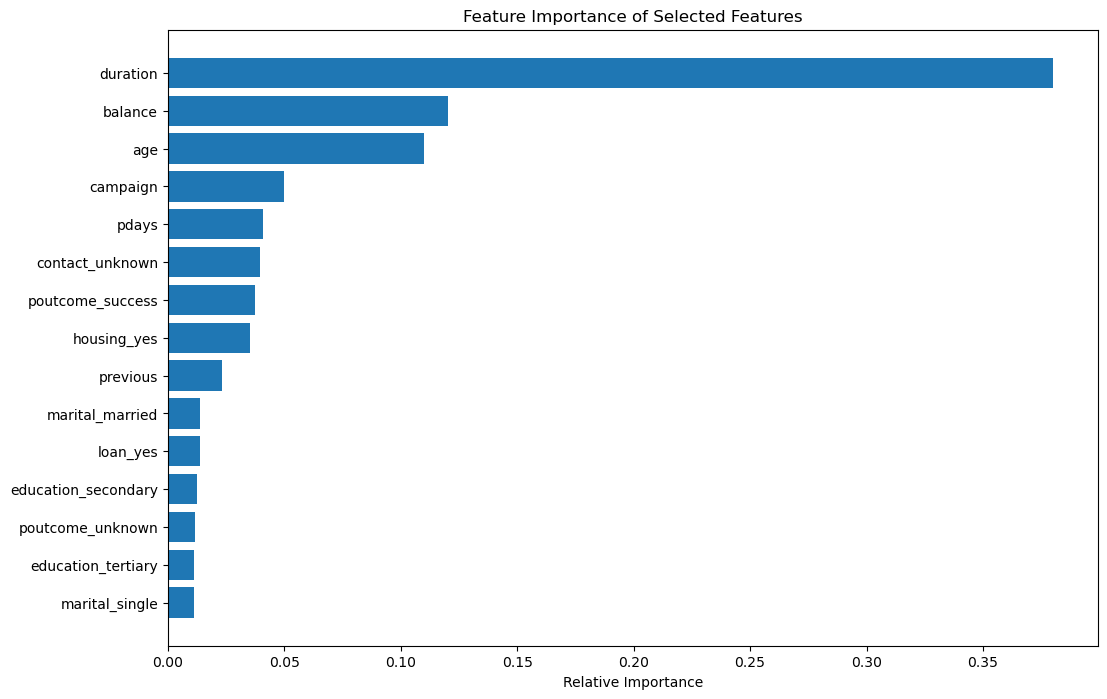

In [171]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importance of Selected Features")
plt.barh(range(len(selected_importances)), selected_importances[indices])
plt.yticks(range(len(selected_importances)), selected_names_sorted)
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  
plt.show()

### 2a. Hyperparameter tuning for a BalancedRandomForestClassifier using GridSearchCV

In [173]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

# Define the model
model_BRC = BalancedRandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # You can extend this range
    'max_depth': [None, 10, 20, 30],  # None means nodes are expanded until all leaves are pure
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']   # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_BRC, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Ravi H S\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
298 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ravi H S\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ravi H S\anaconda3\Lib\site-packages\imblearn\utils\fixes.py", line 78, in wrapper
    estimator._validate_params()
  File "C:\Users\Ravi H S\anaconda3\Lib\site-packages\imblearn\base.py", line 42, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ravi H S\ana

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score:  0.8137579341515035


## Validation with best parameters

- Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
- Best cross-validation score:  0.8137579341515035

In [174]:
brf = BalancedRandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, random_state=42)
brf.fit(X_train, y_train)

# Make predictions
y_pred_ht = brf.predict(X_test)
y_pred_probabilities_ht = brf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred_ht)
classification_rep = classification_report(y_test, y_pred_ht)
roc_auc = roc_auc_score(y_test, y_pred_probabilities_ht)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print(f"ROC-AUC: {roc_auc}")

C:\Users\Ravi H S\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Ravi H S\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.8117811854910056
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11966
           1       0.37      0.84      0.51      1598

    accuracy                           0.81     13564
   macro avg       0.67      0.83      0.70     13564
weighted avg       0.90      0.81      0.84     13564

ROC-AUC: 0.9011278723174149


### Conclusion:

The increased false positives might lead to higher marketing costs, the significantly improved recall score can bring better conversion opportunities, enhanced campaign efficiency, and even greater customer engagement. Therefore, it’s important to realize the trade-offs between precision and recall, and the improved f1-score can be justified in this specific case.

### 3. hyperopt needs higher computational power hence the method is not implemented

In [ ]:
# from hyperopt import fmin, tpe, hp, Trials

# # Define the objective function
# def objective(params):
#     model = BalancedRandomForestClassifier(
#         n_estimators=int(params['n_estimators']),
#         max_depth=params['max_depth'],
#         min_samples_split=int(params['min_samples_split']),
#         min_samples_leaf=int(params['min_samples_leaf']),
#         max_features=params['max_features'],
#         random_state=42
#     )
    
#     # Fit the model
#     model.fit(X_train, y_train)
    
#     # Make predictions and evaluate
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred_cw)
#     classification_rep = classification_report(y_test, y_pred_cw)
#     roc_auc = roc_auc_score(y_test, y_pred_probabilities_cw)

#     # Print evaluation results
#     print(f"Accuracy: {accuracy}")
#     print("Classification Report:")
#     print(classification_rep)
#     print(f"ROC-AUC: {roc_auc}")
    
#     # Return the negative accuracy (since fmin minimizes)
#     return classification_rep

# # Define the parameter space
# space = {
#     'n_estimators': hp.choice('n_estimators', [50, 100, 200]),
#     'max_depth': hp.choice('max_depth', [None, 10, 20, 30]),
#     'min_samples_split': hp.choice('min_samples_split', [2, 5, 10]),
#     'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 4]),
#     'max_features': hp.choice('max_features', ['auto', 'sqrt'])
# }

# # Use Trials to keep track of progress
# trials = Trials()

# # Optimize
# best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# print("Best parameters found: ", best)
